# removeoutlier using z score

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Mobile_sales.csv")
data

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


In [4]:
data.describe()

,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


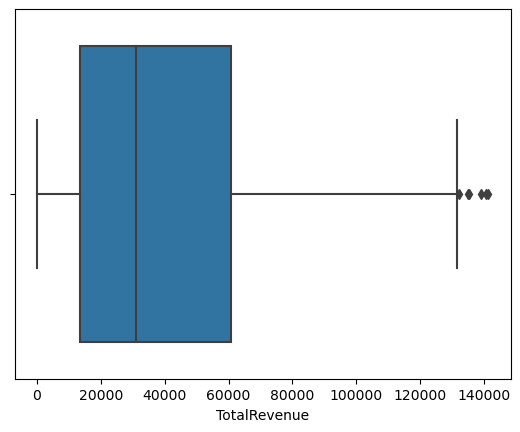

In [7]:
sns.boxplot(x="TotalRevenue",data=data)
plt.show()

C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_18948\3459328885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["TotalRevenue"])


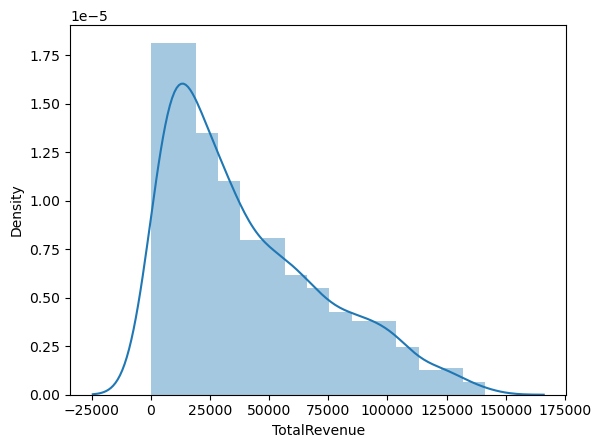

In [9]:
sns.distplot(data["TotalRevenue"])
plt.show()

# normal method

In [17]:
z_min=data["TotalRevenue"].mean()-(3*data["TotalRevenue"].std())
z_max=data["TotalRevenue"].mean()+(3*data["TotalRevenue"].std())

In [18]:
z_min,z_max

(-57927.42603435093, 138364.31611435092)

In [22]:
new_data=data[data["TotalRevenue"]<z_max]
new_data

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


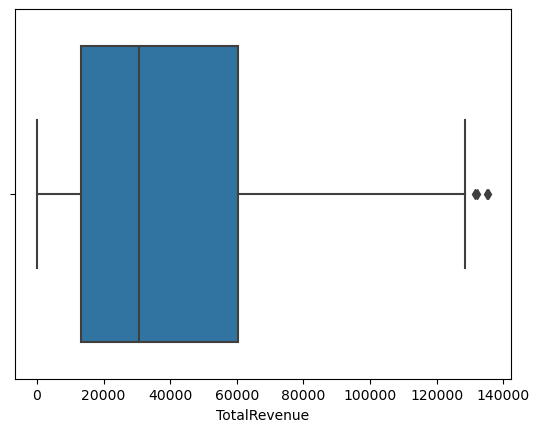

In [23]:
sns.boxplot(x="TotalRevenue",data=new_data)
plt.show()

C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_18948\2621592290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["TotalRevenue"])


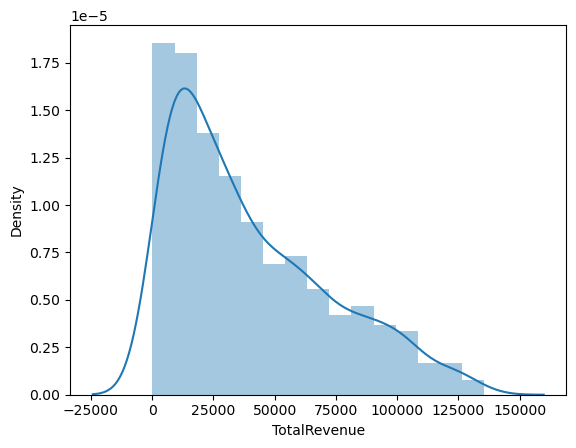

In [24]:
sns.distplot(new_data["TotalRevenue"])
plt.show()

In [25]:
data.describe(),new_data.describe()

(             Price    UnitsSold   TotalRevenue  CustomerAge
 count  1000.000000  1000.000000    1000.000000  1000.000000
 mean    807.512970    50.074000   40218.445040    41.141000
 std     402.489878    28.616804   32715.290358    13.528346
 min     103.320000     1.000000     116.850000    18.000000
 25%     458.037500    25.000000   13316.037500    29.000000
 50%     823.730000    51.000000   30860.655000    41.000000
 75%    1157.875000    75.000000   60770.435000    53.000000
 max    1499.250000    99.000000  141411.840000    64.000000,
              Price   UnitsSold   TotalRevenue  CustomerAge
 count   997.000000  997.000000     997.000000   997.000000
 mean    807.343019   50.040120   39916.794784    41.121364
 std     402.620716   28.635649   32297.834595    13.515286
 min     103.320000    1.000000     116.850000    18.000000
 25%     458.290000   25.000000   13306.580000    29.000000
 50%     823.680000   51.000000   30732.830000    41.000000
 75%    1157.780000   75.00000

# using z_score

In [27]:
z_score=(data["TotalRevenue"]-data["TotalRevenue"].mean())/(data["TotalRevenue"].std())
z_score

0     -0.373393
1     -1.156634
2     -0.271918
3     -0.276895
4     -0.877115
         ...   
995   -0.347016
996    0.313400
997   -1.187109
998   -0.967778
999    0.932937
Name: TotalRevenue, Length: 1000, dtype: float64

In [28]:
data["z_score"]=z_score

In [30]:
data[data["z_score"]<3]

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,z_score
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,-0.373393
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,-1.156634
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,-0.271918
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,-0.276895
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,-0.877115
...,...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card,-0.347016
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card,0.313400
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card,-1.187109
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online,-0.967778


In [31]:
data.isnull().sum()

TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
z_score           0
dtype: int64

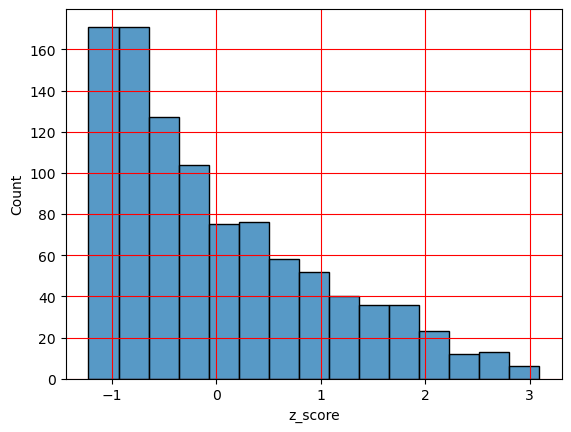

In [37]:
sns.histplot(data["z_score"])
plt.grid(color="red")
plt.show()